In [3]:
from "../lib/syllog_model" import SyllogPyroModel

SyntaxError: invalid syntax (<ipython-input-3-a0174329c32c>, line 1)

In [2]:
with open('icecream.json', 'r') as jsonfile:
    cyjson=jsonfile.read().replace('\n', '')

In [3]:
model = SyllogPyroModel.from_cyjson(cyjson)

In [4]:
model.plot_graph('icecream2.png')

In [5]:
model.get_factor_descriptions()

{'b': {'fn': 'Normal', 'inputs': ['mu', 'sigma'], 'outputs': ['c']},
 'z': {'fn': 'CategoricalOutcome',
  'inputs': ['outcome_mat', 'category'],
  'outputs': ['i']},
 'f': {'fn': 'CategoricalOutcome',
  'inputs': ['outcome_mat', 'category'],
  'outputs': ['i']},
 's': {'fn': 'Bernoulli', 'inputs': ['p'], 'outputs': ['t']}}

In [6]:
model.get_evidence_nodes()

['temp_mean_mat', 'temp_var_mat', 'cloud_prob']

In [12]:
import pyro.distributions as dist
import pyro
import torch

In [13]:
def Normal(_name, mu, sigma):
    return {'c': pyro.sample(_name, dist.Normal(mu, sigma)) }
def Bernoulli(_name, p):
    return {'t': pyro.sample(_name, dist.Bernoulli(p)) }
def CategoricalOutcome(_name, outcome_mat, category):
    return { 'i': outcome_mat[torch.tensor(category).int()] }

factor_functions = { 'Normal': Normal, 'Bernoulli': Bernoulli, 'CategoricalOutcome': CategoricalOutcome }

In [14]:
evidence = {'temp_mean_mat': [75, 55], 'temp_var_mat': [10,15], 'cloud_prob': 0.3}

In [15]:
samples = [model(evidence, factor_functions)['temp'] for i in range(1000)]

/home/wgoldie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [16]:
import matplotlib.pyplot as plt

(array([ 3.,  2.,  2.,  3.,  2.,  2.,  5.,  4.,  7.,  6.,  6., 10.,  9.,
        13., 11., 15., 12., 18., 14., 24., 30., 29., 36., 38., 37., 42.,
        50., 44., 55., 71., 64., 56., 47., 49., 42., 37., 26., 23., 18.,
        17.,  8.,  4.,  4.,  2.,  1.,  1.,  0.,  0.,  0.,  1.]),
 array([ 17.172752,  19.083324,  20.993896,  22.904469,  24.81504 ,
         26.725613,  28.636185,  30.546757,  32.45733 ,  34.3679  ,
         36.278473,  38.189045,  40.099617,  42.01019 ,  43.92076 ,
         45.831333,  47.741905,  49.652477,  51.56305 ,  53.47362 ,
         55.384193,  57.294765,  59.205338,  61.11591 ,  63.02648 ,
         64.93706 ,  66.847626,  68.758194,  70.66877 ,  72.579346,
         74.489914,  76.40048 ,  78.31106 ,  80.221634,  82.1322  ,
         84.04277 ,  85.95335 ,  87.86392 ,  89.77449 ,  91.68506 ,
         93.595634,  95.50621 ,  97.41678 ,  99.32735 , 101.23792 ,
        103.1485  , 105.05907 , 106.969635, 108.88021 , 110.79079 ,
        112.701355], dtype=float32),

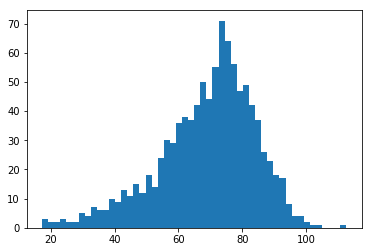

In [17]:
plt.hist(samples, bins=50)